
# Social Network Ads

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#import tensorflow as tf

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [4]:
data.shape

(400, 3)

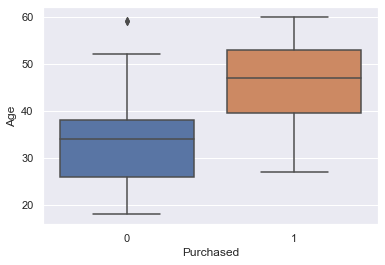

In [5]:
sns.boxplot(data['Purchased'],data['Age']);

We can clearly see that older people tend to buy more than younger people.

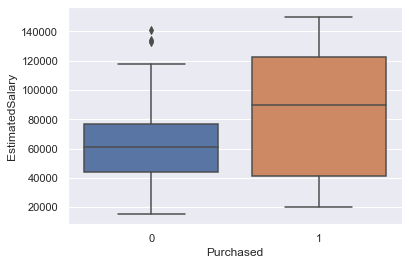

In [6]:
sns.boxplot(data['Purchased'],data['EstimatedSalary']);

We can see that peope who earn more tend to buy more.

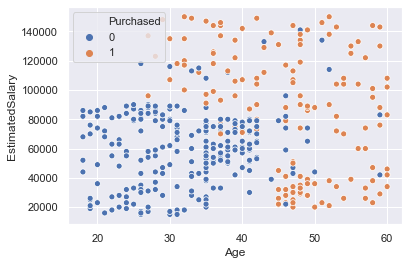

In [7]:
sns.scatterplot(data['Age'],data['EstimatedSalary'],hue=data['Purchased']);

We can see that older people with hgih income tend to purchase more.

In [8]:
data.isnull().sum().max()     # We have no missing values

0

## Model

In [9]:
X = data.drop('Purchased', axis=1)
y = data.Purchased

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Baseline Models (Without Tuning) :

### 1. Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

reg = LogisticRegression()
reg.fit(X_train_scaled,y_train)
y_pred_reg = reg.predict(X_test_scaled)
print('Training Accuracy: ',accuracy_score(y_train,reg.predict(X_train_scaled)))
print('Testing Accuracy: ',accuracy_score(y_test,y_pred_reg))

Training Accuracy:  0.821875
Testing Accuracy:  0.925


### 2. SVM

In [13]:
from sklearn import svm

for i in ['sigmoid','rbf']:
    model = svm.SVC(kernel=i)
    model.fit(X_train_scaled,y_train)
    print('Training Accuracy with kernel={} is {}'.format(i,accuracy_score(y_train,model.predict(X_train_scaled))))
    

Training Accuracy with kernel=sigmoid is 0.659375
Training Accuracy with kernel=rbf is 0.903125


In [14]:
model = svm.SVC(kernel='rbf')
model.fit(X_train_scaled,y_train)
y_pred_svm = model.predict(X_test_scaled)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred_svm))

Testing Accuracy:  0.95


### 3. KNN

Training Accuracy for k= 1 is:  0.996875
Training Accuracy for k= 2 is:  0.91875
Training Accuracy for k= 3 is:  0.915625
Training Accuracy for k= 4 is:  0.9125
Training Accuracy for k= 5 is:  0.91875
Training Accuracy for k= 6 is:  0.909375
Training Accuracy for k= 7 is:  0.909375
Training Accuracy for k= 8 is:  0.909375
Training Accuracy for k= 9 is:  0.9125
Training Accuracy for k= 10 is:  0.909375


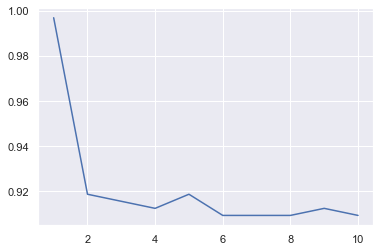

In [15]:
from sklearn.neighbors import KNeighborsClassifier

acc=[]
k=11
for i in range(1,k):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train)
    acc.append(accuracy_score(y_train,knn.predict(X_train_scaled)))
    print('Training Accuracy for k=',i,'is: ',accuracy_score(y_train,knn.predict(X_train_scaled)))
    
num = range(1,k)

plt.plot(num,acc)
plt.show()

In [16]:
knn = KNeighborsClassifier(5)
knn.fit(X_train_scaled,y_train)
y_pred_knn = knn.predict(X_test_scaled)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred_knn))

Testing Accuracy:  0.95


### 4. Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=900)
rfc.fit(X_train_scaled,y_train)
y_pred_rfc = rfc.predict(X_test_scaled)
print('Training Accuracy: ',accuracy_score(y_train,rfc.predict(X_train_scaled)))
print('Testing Accuracy: ',accuracy_score(y_test,y_pred_rfc))

Training Accuracy:  0.996875
Testing Accuracy:  0.925


## Hyperparameter Tuning

### Random Forest

In [18]:
clf = RandomForestClassifier()

In [19]:
hyperparameters_rf = {
    'n_estimators':[100,300,500,700,900,1100,1500],
    'min_samples_leaf':[1,3,5,7,15]
}

In [20]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator=clf,
                            param_distributions=hyperparameters_rf,
                            verbose=5,
                            n_jobs=4,
                            cv=5,
                            random_state=0)

In [21]:
random.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   14.5s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   46.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [22]:
random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
clf = RandomForestClassifier(min_samples_leaf=3, n_estimators=900)

In [24]:
clf.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
y_pred_clf = clf.predict(X_test_scaled)
print('Training Accuracy: ',accuracy_score(y_train,clf.predict(X_train_scaled)))
print('Testing Accuracy: ',accuracy_score(y_test,y_pred_clf))

Training Accuracy:  0.925
Testing Accuracy:  0.95


Thus, after tuning, we decreased overfitting the training set and increased testing accuracy to 95%

### XGBoost

In [26]:
import xgboost as xgb

In [27]:
model = xgb.XGBClassifier()

In [28]:
hyperparameters_xgb = {
    'n_estimators':[100,300,500,700,900,1100,1500],
    'learning_rate':[0.01,0.05,0.1,0.15,0.2],
    'booster':['gbtree','gblinear'],
    'max_depth':[1,3,5,10,15]
}

In [29]:
random_xgb = RandomizedSearchCV(estimator=model,
                            param_distributions=hyperparameters_xgb,
                            verbose=5,
                            n_jobs=4,
                            cv=5,
                            random_state=0)

In [30]:
random_xgb.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    6.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_

In [31]:
random_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=1500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=1500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [33]:
model.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=1500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
y_pred_xgb = model.predict(X_test_scaled)
print('Training Accuracy: ',accuracy_score(y_train,model.predict(X_train_scaled)))
print('Testing Accuracy: ',accuracy_score(y_test,y_pred_xgb))

Training Accuracy:  0.921875
Testing Accuracy:  0.95


Hence, the maximum testing accuracy I recieved for the model is 95%